![En tête general](https://raw.githubusercontent.com/PythonLycee/PyLyc/master/img/En_tete_general.png)


<i>© Copyright Franck CHEVRIER 2019-2021 https://www.python-lycee.com.</i><br>
<i>Les activités partagées sur <a href="https://capytale2.ac-paris.fr/web/accueil"><strong>Capytale</strong></a> sont sous licence <a href="https://creativecommons.org/licenses/by-sa/3.0/fr/">Creative Commons</a>.</i>

<span style="color: #9317B4"> Pour exécuter une saisie Python, sélectionner la cellule et valider avec </span><span style="color: #B317B4"><strong>SHIFT+Entrée</strong></span>.


# La planche de Galton <span style="color: red"> (corrigé)</span> 

### <span style="color: red"> Attention: Pour que les animations Matplot du corrigé soient dynamiques, il est nécessaire de redémarrer l'ensemble des cellules du Notebook (Menu Kernel -> "Restart & Run all").</span>

<span style="color: #7C39C9">*Le but de l’activité est de :*</span> 

<ul style="color: #7C39C9">
    <li><em>comprendre le principe de la <a href="https://fr.wikipedia.org/wiki/Planche_de_Galton">planche de Galton</a> ;</em></li>
    <li><em>simuler son comportement en programmation Python ;</em></li>
    <li><em>effectuer les calculs des probabilités liées à ce dispositif.</em></li>
</ul>

<span style="color: #7C39C9"><strong> Pour une présentation de la planche de Galton, voir la vidéo suivante.</strong></span>


<video controls src="https://raw.githubusercontent.com/PythonLycee/PyLyc/master/video/Galton_1(intro).mp4" width="960" height="540" />

<span style="color: #7C39C9">*On note $N$ le nombre d'étages de la planche de Galton, et on considère le repère tel que ci-dessous, dans lequel les clous de la planche sont à coordonnées entières. L'abscisse initiale d'une bille vaut 0 puis augmente ou diminue de 1 à chaque étage. On modélisera la trajectoire d'une bille sur cette planche à l'aide de la liste des abscisses successives prises par la bille.*</span>

![Planche_de_Galton_Avec_Repere](https://raw.githubusercontent.com/PythonLycee/PyLyc/master/img/Planche_Galton_Repere.png)

## 1. Etude d'une planche de Galton à 5 étages

__Dans cette partie, on suppose que $N=5$. La planche est donc composée de 5 rangées de clous.__

__1.1. Créer une liste <mark>abs_bille</mark> correspondant à une trajectoire possible d'une bille sur la planche, dont la première valeur est 0, et comportant 6 valeurs.__

<span style="color: #888888"> Pour exécuter la saisie Python, sélectionner la cellule et valider avec </span><span style="color: #888888"><strong>SHIFT+Entrée</strong>. Faire de même au fur et à mesure de l'activité pour les cellules suivantes</span>.

In [1]:
# Effectuer la saisie pour créer la liste abs_bille
abs_bille=[0,-1,-2,-1,-2,-3]


__1.2. La fonction Python <mark>Visualisation_Planche_Galton</mark> donnée dans la cellule ci-dessous permet d'observer des trajectoires de billes à partir des listes de leurs abscisses. Exécuter les deux cellules suivantes pour appeler cette fonction <mark>Visualisation_Planche_Galton</mark> avec <mark>abs_bille</mark> précédemment généré.__

In [2]:
#Exécuter cette cellule pour mettre la fonction Visualisation_Planche_Galton en mémoire

from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

def Visualisation_Planche_Galton(Positions_billes, attente=3, Temps_total=5000, hauteur=8, resolution=80):
    '''
    Fonction permettant la visualisation d'une chute de billes sur la planche de Galton
    Liste_billes: chaque élément est la liste des abscisses d'une bille (list)
    attente: attente entre chaque bille lachée: écart des ordonnées entre deux billes successives (int) 
    Temps_total: Durée totale de visionnage en ms (int) 
    hauteur: Hauteur du graphique en pouces (float)
    resolution: résolution en dpi (int)
    '''
    #Duplication profonde de la liste des listes des abscisses
    Liste_billes=deepcopy(Positions_billes)
    
    N=max([len(b) for b in Liste_billes])-1 #hauteur de la planche (Attention: les listes ont normalement la même taille)
    M=len(Liste_billes)//2+1 #hauteur du réceptacle pour les billes
            
    #Réglages de la fenêtre d'affichage
    largeur=2*N*hauteur/(N+M+0.25) ; borne_x=N+1/2
    plt.figure(num=0, figsize=(largeur,hauteur), dpi=resolution) ; fig,ax = plt.subplots(num=0)    
    ax.set_xlim(( -borne_x,borne_x)) ; ax.set_ylim((-M-0.25, N)) ; ax.xaxis.set_ticks(range(-N,N+1))
    plt.tick_params(axis = 'x', labelsize = 8) ; plt.yticks([], [])    
    
    #taille des billes
    taille_bille=242//(N+M+0.25)   
    
    #représentation de la planche de Galton
    list_x=[2*k-(L-1) for L in range(N+1) for k in range(L)]
    list_y=[N-L for L in range(N+1) for k in range(L)]
    Trace_Galton,= ax.plot(list_x,list_y, ls="none", marker=".",color="black")
    
    #Objet pour la représentation des billes descendantes   
    Trace_billes,= ax.plot([], [], ls="none", marker="o",color="blue", markersize=taille_bille)  
     
    #Objet pour la représentation des billes accumulées dans le réceptacle     
    Trace_point_acc, = ax.plot([], [], ls="none", marker="o",color="blue", markersize=taille_bille)
    
    #Liste des effectifs de billes accumulées         
    accumulation=[0 for x in range(-N,N+1)]
    
    #Initialisation des positions des billes
    b_x=[None for p in range(len(Liste_billes))] # liste des abscisses des billes à placer           
    b_y=[None for p in range(len(Liste_billes))] # liste des ordonnées des billes à placer
    
    def init():
        """
        Fonction initialisant l'animation
        """
        return (Trace_Galton,Trace_billes,Trace_point_acc,)   
    
    def animate(i):     
        """
        Fonction définissant la i ème scène de l'animation
        """
        #gestion des billes en descente
        for p in range(len(Liste_billes)): #pour chaque bille
            if Liste_billes[p] and i>=attente*p:#s'il reste des positions à traiter et qu'on a lâché la bille
                if len(Liste_billes[p])>1: #si ce n'est pas la dernière position
                    b_x[p],b_y[p] = Liste_billes[p].pop(0),N-i+attente*p #on place la bille à sa position et on efface cette position
                elif -M+0.5*(accumulation[N+int(Liste_billes[p][0])]-1)<N-i+attente*p: #sinon si on n'a pas atteint la hauteur accumulée
                    b_x[p],b_y[p] = Liste_billes[p][0],N-i+attente*p #on place la bille à sa nouvelle position (descente verticale)
                else: #sinon
                    accumulation[N+int(Liste_billes[p].pop(0))]+=1 #on compte la bille comme accumulée 
                    b_x[p],b_y[p] = None,None #et on supprime la position                  
        
        #Représentation des billes en descente
        Trace_billes.set_data(b_x,b_y)  
        
        #Représentation des billes accumulées dans les réceptacles       
        l_x,l_y = [k for k in range(-N,N+1) for y in range(accumulation[N+k])],[-M+0.5*y for k in range(-N,N+1) for y in range(accumulation[N+k])]
        Trace_point_acc.set_data(l_x,l_y)    
                
        return (Trace_Galton,Trace_billes,Trace_point_acc,)
      
    #Création de l'animation
    Nb_images=attente*len(Liste_billes)+N+M
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nb_images, interval=Temps_total/Nb_images, blit=False, repeat=False)   
    
    return HTML(anim.to_jshtml())


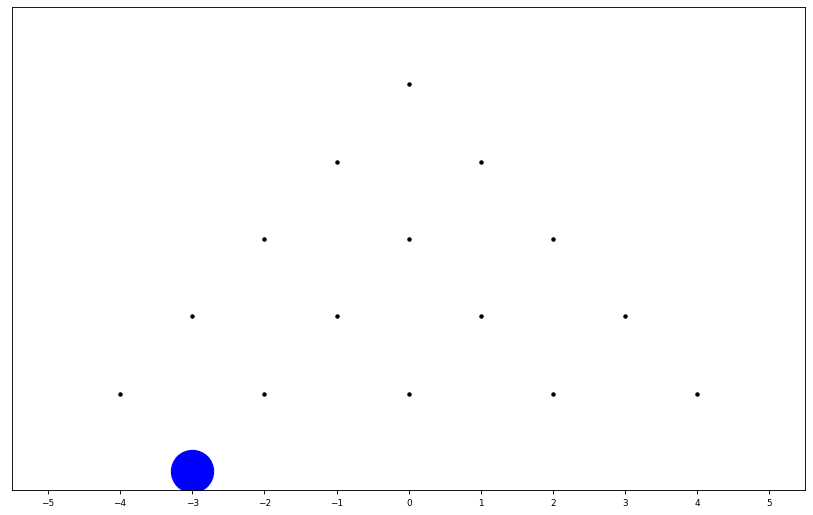

In [3]:
#Exécuter cette cellule pour observer la trajectoire de la bille correspondante à abs_bille

Visualisation_Planche_Galton( [abs_bille] )


__1.3.a. Si lors de sa descente sur la planche l'abscisse de la bille vaut $x$, quelles sont les valeurs possibles pour son abscisse à l'étape suivante ? Quelles sont les probabilités d'obtenir chacune de ces valeurs ?__

<span style="color: red"> Si l'abscisse de la bille vaut $x$, les valeurs possibles pour l'abscisse suivante sont $x-1$ et $x+1$, de façon équiprobable, donc avec des probabilités associées égales à $\frac{1}{2}$.</span>

__1.3.b. Ecrire une fonction Python <mark>suiv</mark>, qui reçoit <mark>x</mark> en argument, et qui renvoie l'abscisse suivante de la bille.__

Aide : L'import <mark>from random import random</mark> permet d'utiliser la fonction <mark>random()</mark> qui renvoie une valeur aléatoire de l'intervalle $[0;1[$. La syntaxe <mark>random()<1/2</mark> est donc un test permettant de générer équiprobablement <mark>True</mark> ou <mark>False</mark>.




In [4]:
#Ecrire ici la fonction suiv d'argument x
from random import random

def suiv(x):
    if random()<1/2:
        return x-1
    return x+1


__1.4.a. On considère la fonction Python <mark>trajet</mark>ci-dessous. Quelle est son utilité ? Compléter sa description.__


In [5]:
def trajet():
    '''
    Fonction qui génère une liste correspondant à un trajet aléatoire d'une bille 
    sur la planche de Galton à 5 étages
    '''
    x=0
    L=[x]
    for k in range(5):
        x=suiv(x)
        L.append(x)
    return L 

__1.4.b. A l'aide de cette fonction, créer une liste <mark>abs_bille</mark>, puis valider les cellules suivantes pour observer la trajectoire de la bille.__

In [6]:
#Créer ici une liste abs_bille à l'aide de la fonction trajet précédente

abs_bille=trajet()

In [7]:
#Valider cette cellule pour voir la liste abs_bille qui a été générée
abs_bille


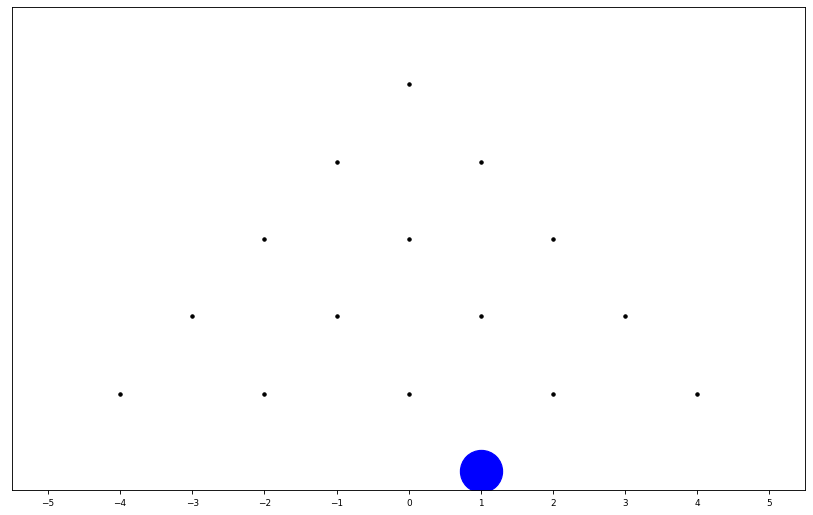

In [8]:
#Exécuter cette cellule pour observer le trajet de la bille

Visualisation_Planche_Galton( [abs_bille] )


__1.5.a. On construit ci-dessous une liste en compréhension nommée <mark>liste_trajets</mark> permettant de modéliser 50 trajets de billes différentes sur la planche. Valider les cellules pour afficher les listes d'abscisses et observer ces trajets sur la planche de Galton (Patienter pendant les calculs...).__


In [9]:
#Valider la cellule

#Création d'une liste de trajets de 50 billes
liste_trajets = [ trajet() for b in range(50) ]

#Affichage des trajets
liste_trajets

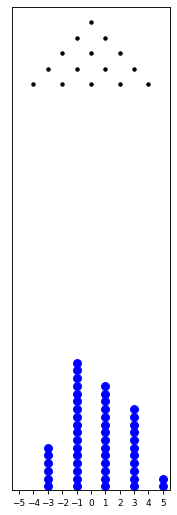

In [10]:
#Création de l'animation sur la planche de Galton
Visualisation_Planche_Galton( liste_trajets )

__1.5.b. Décrire le résultat. Y a-t-il certaines sorties de la planche de Galton qui semblent moins fréquentes que d'autres ?__


<span style="color: red">Il semble que les billes arrivent moins souvent sur les bords de la planche de Galton.</span>

__1.5.c. Visionner la vidéo ci-dessous. Votre conjecture de la question 1.5.b. semble-t-elle se vérifier?__

<span style="color: red">La conjecture précédente semble vérifiée pour cette expérience.</span>


<video controls src="https://raw.githubusercontent.com/PythonLycee/PyLyc/master/video/Galton_2(chute).mp4" width="960" height="540" />



__1.6. On considère l'expérience qui consiste à faire descendre une bille sur la planche de Galton à 5 étages. On note X la variable aléatoire qui correspond au nombre de fois où la bille a tourné à droite.__

<ul>
    <li type='None'><strong>a. Calculer la probabilité que X soit égal à 5.</strong></li>
    <li type='None'><strong>b. Justifier que X suit une loi binomiale et préciser ses paramètres.</strong></li>
    <li type='None'><strong>c. Dresser le tableau de la loi de probabilité de X.</strong></li>
    <li type='None'><strong>d. Si X=2, quelle est l'abscisse finale de la bille ?</strong></li>
    <li type='None'><strong>e. On note Y la variable aléatoire qui correspond à l'abscisse finale de la bille. Dresser le tableau de la loi de probabilité de Y. Comparer les résultats avec les observations des questions 1.5.b. et 1.5.c.</strong></li>
</ul>


<span style="color: red">a. $p(X=5)=\left( \frac{1}{2} \right)^5=0,03125$</span>


<span style="color: red">b. Si on note $S$ l'événement "la bille tourne à droite" et $E=\bar{S}$, alors l'expérience consiste en la répétition de $5$ épreuves de Bernoulli identiques et indépendantes. X compte le nombre de succès donc X$\sim \mathcal{B} \left( 5,\frac{1}{2} \right)$.</span>


<span style="color: red">c. Tableau de la loi de probabilité de X:</span>


| $ \;\; \; \; \; \; x_i \; \; \; \; \; \;\; \; \; \; \; \; $  | $ 0 $ | $ 1 $ | $ 2 $ | $ 3 $ | $ 4 $ | $ 5 $ |  
| ------------| ----------- | ------------ | ---------- | ---------- | ----------- | ----------- |  
| $p\left( X=x_i\right)$ | $0.03125$ | $0.15625$ |$0.3125$ |$0.3125$ |$0.15625$ |$0.03125$ |  


<span style="color: red">d. Si X$=2$ alors la bille a tourné deux fois à droite et trois fois à gauche, et son abscisse finale vaut $-1$.</span>


<span style="color: red">e. Tableau de la loi de probabilité de Y:</span>


| $ \;\; \; \; \; \; y_i \; \; \; \; \; \;\; \; \; \; \; \; $  | $ -5 $ | $ -3 $ | $ -1 $ | $ 1 $ | $ 3 $ | $ 5 $ |  
| ------------| ----------- | ------------ | ---------- | ---------- | ----------- | ----------- |  
| $p\left( y=y_i\right)$ | $0.03125$ | $0.15625$ |$0.3125$ |$0.3125$ |$0.15625$ |$0.03125$ |  


<span style="color: red">Les probabilités que la bille arrive sur les bords de la planche de Galton sont bien nettement plus faibles.</span>

## 2. Généralisation


__2.1. On reprend la fonction <mark>trajet</mark> (vue dans la question 1.4.a.). Ajouter un argument <mark>N</mark> pour que la fonction permette de générer une liste correspondant à un trajet d'une bille sur une planche de Galton à <mark>N</mark> étages.__

In [11]:
#Ajouter l'argument N à la fonction trajet

def trajet(N):
    '''
    Fonction qui génère une liste correspondant à un trajet aléatoire d'une bille 
    sur la planche de Galton à N étages
    '''
    x=0
    L=[x]
    for k in range(N):
        x=suiv(x)
        L.append(x)
    return L 

__2.2.a. Dans la cellule ci-dessous, créer une liste <mark>liste_trajets</mark> permettant de modéliser 100 trajets de billes sur une planche de Galton à 10 étages.__

Aide: On pourra s'inspirer de la syntaxe utilisée dans la question 1.5.a.

In [12]:
#Créer liste_trajets correspondant à 100 trajets de billes sur une planche de Galton à 10 étages
liste_trajets = [ trajet(10) for b in range(100) ]

__2.2.b. Valider les cellules pour afficher les listes d'abscisses et observer ces trajets sur la planche de Galton (Patienter pendant les calculs...).__

In [13]:
#Valider cette cellule pour afficher les listes de trajets
liste_trajets

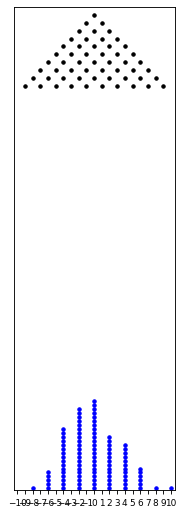

In [14]:
#Création de l'animation sur la planche de Galton
Visualisation_Planche_Galton( liste_trajets )

__2.3.a. Exécuter les cellules ci-dessous. Dans chaque cas, indiquer ce que permet d'obtenir la syntaxe proposée.__

<mark style="color: red">liste_trajets[0]</mark> <span style="color: red"> permet d'obtenir la liste des abscisses de la 1ère bille (de rang 0).</span>


<mark style="color: red">liste_trajets[0][-1]</mark> <span style="color: red"> permet d'obtenir l'abscisse finale de la 1ère bille (de rang 0).</span>


<mark style="color: red">liste_trajets[1]</mark> <span style="color: red"> permet d'obtenir la liste des abscisses de la 2ème bille (de rang 1).</span>


<mark style="color: red">liste_trajets[1][-1]</mark> <span style="color: red"> permet d'obtenir l'abscisse finale de la 2ème bille (de rang 1).</span>



In [15]:
liste_trajets[0] #permet d'obtenir la liste des abscisses de la bille de rang 0

In [16]:
liste_trajets[0][-1] #permet d'obtenir l'abscisse finale de la bille de rang 0

In [17]:
liste_trajets[1] #permet d'obtenir la liste des abscisses de la bille de rang 1

In [18]:
liste_trajets[1][-1] #permet d'obtenir l'abscisse finale de la bille de rang 1

__2.3.b. Ecrire une fonction <mark>decompte</mark> qui compte, dans une liste <mark>liste_trajets</mark>, le nombre de billes qui ont pour abscisse finale 4.__

In [19]:
# Ecrire la fonction decompte

def decompte(liste_trajets):
    compteur=0
    for k in range(len(liste_trajets)):
        if liste_trajets[k][-1]==4:
            compteur=compteur+1
    return compteur

#test avec la liste précédemment générée
decompte(liste_trajets)

__2.3.c. Modifier la fonction <mark>decompte</mark> pour qu'elle compte le nombre de billes qui ont pour abscisse finale <mark>a</mark> où <mark>a</mark> est donné en argument de la fonction.__

In [20]:
# Ecrire la fonction decompte modifiée

def decompte(liste_trajets,a):
    compteur=0
    for k in range(len(liste_trajets)):
        if liste_trajets[k][-1]==a:
            compteur=compteur+1
    return compteur


__2.3.d. Ecrire une fonction <mark>frequence</mark> qui reçoit un entier <mark>a</mark> en argument et renvoie la fréquence de billes qui ont pour abscisse finale <mark>a</mark>.__

In [21]:
# Ecrire la fonction frequence

def frequence(liste_trajets,a):
    return decompte(liste_trajets,a)/len(liste_trajets)

__2.3.e A l'aide de cette fonction <mark>frequence</mark>, déterminer la fréquence de billes dont l'abscisse finale vaut 4 pour les trajets stockés dans <mark>liste_trajets</mark>.__

In [22]:
# Effectuer l'appel à la fonction frequence
f=frequence(liste_trajets,4)
f

__2.4.a. Calculer la probabilité qu'une bille ait pour abscisse finale 4 sur la planche de Galton à 10 étages. Calculer l'écart entre cette valeur et la valeur obtenue à la question 2.3.e.__

On pourra utiliser la fonction <mark>combinaison</mark> ci-dessous, qui permet de calculer le coefficient binomial <font size="1"> $\displaystyle \left( \begin{array}{c} n \\ k \end{array} \right)$ </font>.

<span style="color: red"> Une bille a pour abscisse finale 4 si et seulement si elle a tourné exactement 7 fois à droite et 3 fois à gauche. Si on note $X$ la variable aléatoire qui correspond au nombre de virages à droite de la bille, alors $X$ suit la loi binomiale de paramètre $n=10$ et $p=\frac{1}{2}$.</span>

<span style="color: red"> La probabilité cherchée est donc $p(X=7)=\left(   \begin{array}{c} 10 \\ 7 \end{array}     \right) \times \left(\frac{1}{2}\right) ^7 \times \left(\frac{1}{2}\right) ^3=\left(\begin{array}{c} 10 \\7 \end{array}\right)\times \left(\frac{1}{2}\right) ^{10}=0,1171875$</span>

In [23]:
from math import factorial

def combinaison(n,k): 
    "fonction qui calcule le coefficient binomial de paramètres n et k"
    return factorial(n)//(factorial(k)*factorial(n-k))

In [24]:
# Effectuer une saisie pour le calcul de la probabiltié
p=combinaison(10,7)*(1/2)**10
p

__2.4.b. Calculer l'écart entre les valeurs obtenues aux questions 2.3.e. et 2.4.a.__


In [25]:
# Effectuer une saisie pour la comparaison des deux valeurs
abs(f-p)

![Galton](https://raw.githubusercontent.com/PythonLycee/PyLyc/master/img/Sir_Francis_Galton.jpg)

<center><a href="https://fr.wikipedia.org/wiki/Francis_Galton">Sir Francis Galton (1822-1911)</a></center>


<i>© Copyright Franck CHEVRIER 2019-2021 https://www.python-lycee.com.</i><br>
<i>Les activités partagées sur <a href="https://capytale2.ac-paris.fr/web/accueil"><strong>Capytale</strong></a> sont sous licence <a href="https://creativecommons.org/licenses/by-sa/3.0/fr/">Creative Commons</a>.</i>